C:\Users\ramsa\AppData\Local\Temp\ipykernel_10300\1649093709.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['time'] = pd.to_datetime(data['time']).apply(lambda x: x.timestamp())


Model Accuracy: 0.6827710676107177

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.77      0.78      5268
           1       0.42      0.44      0.43      1935

    accuracy                           0.68      7203
   macro avg       0.60      0.61      0.60      7203
weighted avg       0.69      0.68      0.69      7203


Confusion Matrix:
[[4061 1207]
 [1078  857]]


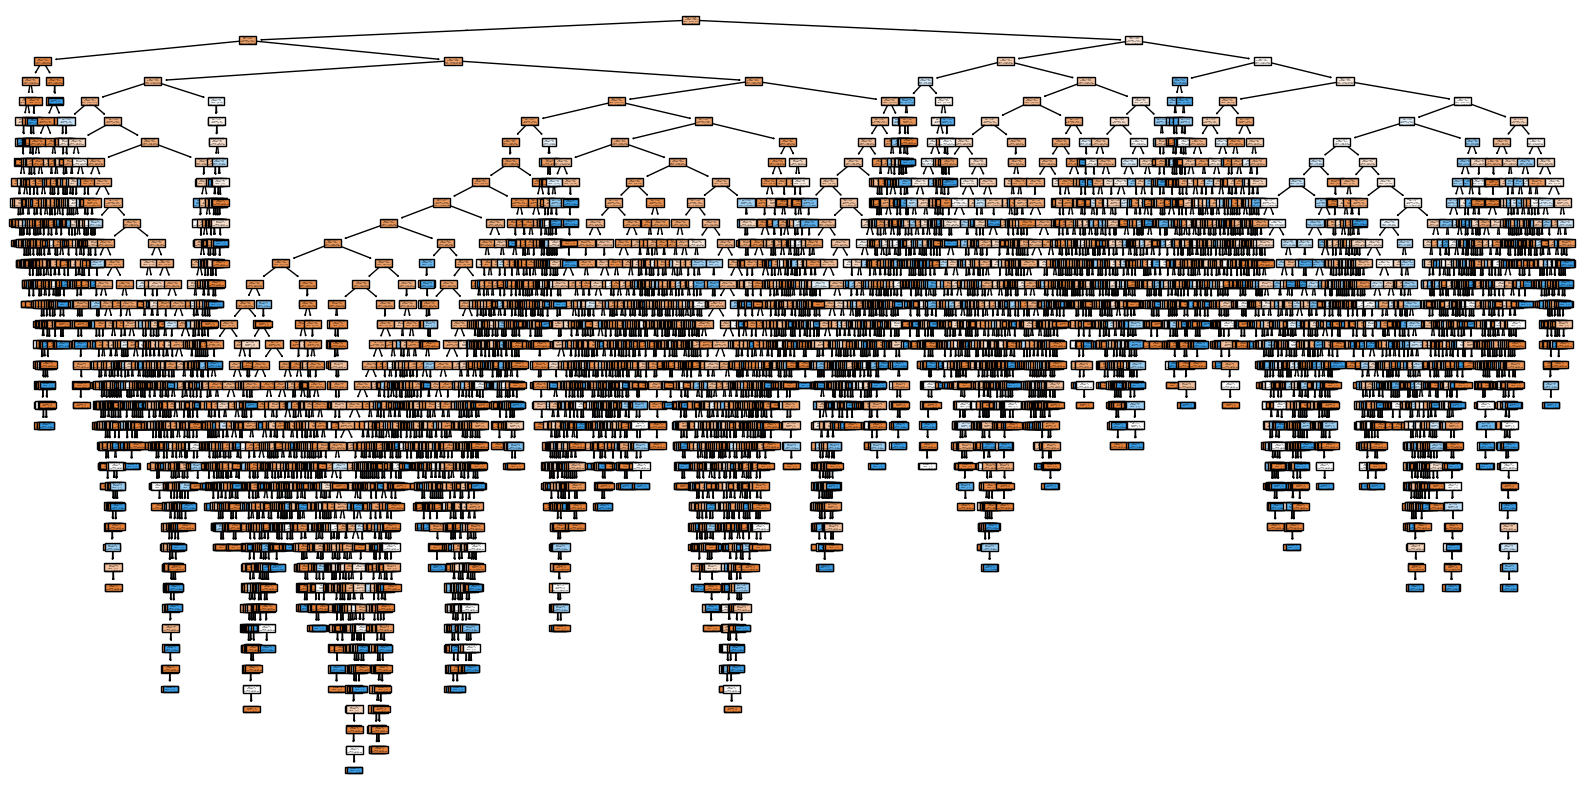

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import pickle

# Load the dataset
data = pd.read_csv("earthquake_with_label.csv")

# Convert 'time' to timestamp
data['time'] = pd.to_datetime(data['time']).apply(lambda x: x.timestamp())

# Rename columns for consistency
# data.rename(columns={'md': 'magnitude', 'lat': 'latitude', 'long': 'longitude'}, inplace=True)
data.rename(columns={'depth': 'depth', 'lat': 'latitude', 'long': 'longitude'}, inplace=True)

# Feature selection
# X = data[['magnitude', 'latitude', 'longitude', 'time']]
X = data[['depth', 'latitude', 'longitude', 'time']]
y = data['Label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Save the trained model
with open("earthquake_decision_tree_model.pkl", "wb") as file:
    pickle.dump(model, file)

# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=['depth', 'latitude', 'longitude', 'time'],
          class_names=['No Earthquake', 'Earthquake'], filled=True)
plt.show()
